# Spam Filter Classifier.

## Project Description: 
- There are three datasets for training: TrainDataset1.csv, TrainDataset2.csv and TrainDataset3.txt. Each dataset contains short messages with the labels (ham or spam). 
- Analyse, clean and visualise these datasets.
- Combine them into one big data set for the training
- Use this dataset in order to build your own Naive Bayes classifier. (You can either use existing Naive Bayes from sklearn or build your own one)
- Verify your Classifier using new messages (create your own messages or use the messages from the TestDataset.csv dataset).

## Project Duration: 2 weeks
## Project Deliverables:
1. End of the first week do Data preprocessing: 
    - Load the dataset using pandas, 
    - Analysis it for this you will need to process the text, namely remove punctuation and stopwords, and then create a list of clean text words. (Research how to do this) 
    - Visualise the results
    - Prepare the pre-processed data for the usage by Naive Bayes Classifier
2. End of the second week:
    - Train the classifier,
    - Validate it, build confusion matrix, analyse its results
    - Apply it to new test messages,
    - Try to cheat the classifier by adding "good words" to the end of test message.

## Import and sort the data

In [1]:
import pandas as pd
import numpy as np
import string

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix

# For the Visualisation
from os import path
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from IPython.display import Image


In [35]:
# Read datasets
test_data = pd.read_csv('TestDataset.csv')
train_data_1 = pd.read_csv('TrainDataset1.csv')
train_data_2 = pd.read_csv('TrainDataset2.csv')
train_data_3 = pd.read_csv('TrainDataset3.txt', sep="\t", names=['tag','text'])

train_data_1.columns = ['tag', 'text']
train_data_2.columns = ['tag', 'text']
test_data.columns = ['text']

train_set = pd.concat([train_data_1, train_data_2, train_data_3])

text_set = train_set.text
tag_set = train_set.tag


## Visualise the data

In [3]:
text = train_data_1['text'].tolist() + train_data_2['text'].tolist() + train_data_3['text'].tolist()
tags = train_data_1['tag'].tolist() + train_data_2['tag'].tolist() + train_data_3['tag'].tolist()

# Generate strings for wordcloud
ham_text = " ".join([words for words, tag in zip(text, tags) if tag == "ham"])
spam_text = " ".join([words for words, tag in zip(text, tags) if tag == "spam"])

# Generate wordcloud
ham_wordcloud = WordCloud(height=500, width=500, background_color='white').generate(ham_text)
spam_wordcloud = WordCloud(height=500, width=500, background_color='white').generate(spam_text)

# Save wordclouds
ham_wordcloud.to_file("img/ham_wordcloud.jpg")
spam_wordcloud.to_file("img/spam_wordcloud.jpg")

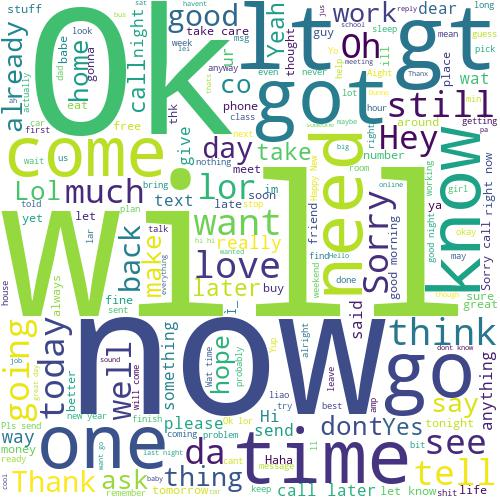

In [4]:
Image("img/ham_wordcloud.jpg")

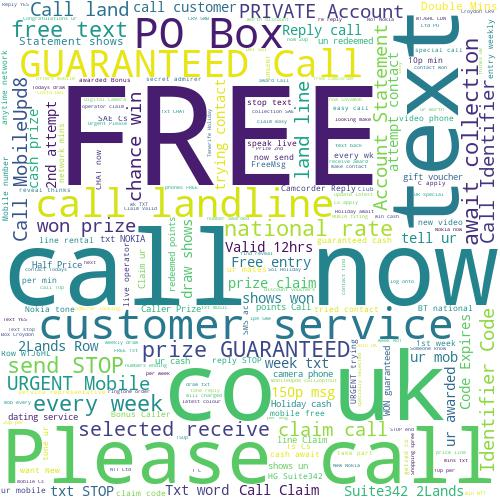

In [5]:
Image("img/spam_wordcloud.jpg")

## Train the network

In [32]:
# Seperate training and test sets
text_train, text_test, tags_train, tags_test = train_test_split(text_set, tag_set)

# Create shorthand
cv = CountVectorizer()
classifier = MultinomialNB()

#Learn the vocabulary dictionary and return term-document matrix.
counts = cv.fit_transform(text_train.values)
targets = tags_train.values

classifier.fit(counts, targets)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

## Test and validate the training

In [33]:
# Test the training against the test set
test_count = cv.transform(text_test.values)
tags_predictions = classifier.predict(test_count)

# Compare the predicted to actual values
print('True values')
print(tags_test.values)
print('Predictions')
print(tags_predictions)

# Print the resulting confusion matrix
print('\nConfusion matrix')
my_confusion_matrix = confusion_matrix(tags_test.values, tags_predictions)
print(my_confusion_matrix)

True values
['ham' 'ham' 'spam' ... 'ham' 'ham' 'ham']
Predictions
['ham' 'ham' 'ham' ... 'ham' 'ham' 'ham']

Confusion matrix
[[3332   20]
 [  19  526]]


## Apply training to the test data

In [38]:
test_data_count = cv.transform(test_data.text.values)
test_predicitons = classifier.predict(test_data_count)

spam_strs = []
for idx, prediction in enumerate(test_predicitons):
    print("{}: {}".format(prediction, test_data.text[idx]))
    if prediction == "spam":
        spam_strs.append(test_data.text[idx])

y lor. I thk e nite scenery not so nice leh.
ham"
spam: Get a brand new mobile phone by being an agent of The Mob! Plus loads more goodies! For more info just text MAT to 87021.
spam: Had your mobile 11mths ? Update for FREE to Oranges latest colour camera mobiles & unlimited weekend calls. Call Mobile Upd8 on freefone 08000839402 or 2StopTx
ham: Hmm... Dunno leh, mayb a bag 4 goigng out dat is not too small. Or jus anything except perfume, smth dat i can keep.
spam: We have sent JD for Customer Service cum Accounts Executive to ur mail id, For details contact us
ham: I asked you to call him now ok
ham: Got ur mail Dileep.thank you so muchand look forward to lots of support...very less contacts here,remember one venugopal you mentioned.tomorrow if not late,i shall try to come up till there.goodnight dear.
ham: \SHIT BABE.. THASA BIT MESSED UP.YEH
ham: K..k:)where are you?how did you performed?
ham: Sent me ur email id soon
ham: My friend, she's studying at warwick, we've planned to go 

## Attempt to trick the training

In [42]:
good_words = "know will got ok time one come today going ok know want need love"

trick_str = [string + good_words for string in spam_strs]

trick_data_count = cv.transform(trick_str)
trick_predicitons = classifier.predict(trick_data_count)

for idx, prediction in enumerate(trick_predicitons):
    print("{}: {}".format(prediction, trick_str[idx]))

ur friend 1/1know will got ok time one come today going ok know want need love
spam: U are subscribed to the best Mobile Content Service in the UK for å£3 per 10 days until you send STOP to 82324. Helpline 08706091795know will got ok time one come today going ok know want need love
spam: Thanks for your ringtone order, reference number X29. Your mobile will be charged 4.50. Should your tone not arrive please call customer services 09065989180know will got ok time one come today going ok know want need love
ham: U have a Secret Admirer who is looking 2 make contact with U-find out who they R*reveal who thinks UR so special-call on 09065171142-stopsms-08718727870150ppmknow will got ok time one come today going ok know want need love
spam: PRIVATE! Your 2004 Account Statement for 07742676969 shows 786 unredeemed Bonus Points. To claim call 08719180248 Identifier Code: 45239 Expiresknow will got ok time one come today going ok know want need love
spam: This is the 2nd time we have tried 2 